In [1]:
import numpy as np
import sklearn as sks
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("host_train.csv")
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
pd.set_option("max_rows", None)
df.isnull().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [ ]:
df.isnull().mean() * 100

In [7]:
df['City_Code_Patient'].mode()

0    8.0
dtype: float64

In [8]:
df.fillna({'City_Code_Patient':df.mode()['City_Code_Patient'][0], 'Bed_Grade':df.mode()['Bed_Grade'][0]}, inplace=True)

In [9]:
df.isnull().mean() * 100

case_id                              0.0
Hospital                             0.0
Hospital_type                        0.0
Hospital_city                        0.0
Hospital_region                      0.0
Available_Extra_Rooms_in_Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility                        0.0
Bed_Grade                            0.0
patientid                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Illness_Severity                     0.0
Patient_Visitors                     0.0
Age                                  0.0
Admission_Deposit                    0.0
Stay_Days                            0.0
dtype: float64

In [10]:
df.describe()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,1.256841,4.771717,0.778098,3.197627,2.625585,65747.579472,7.262506,3.284099,4880.749392
std,91925.276847,8.633755,1.535712,3.102535,0.752527,1.168171,0.873070,37979.936440,4.712210,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,1.000000,5.000000,1.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
df.describe(include=['O'])

,Department,Ward_Type,Ward_Facility,Type of Admission,Illness_Severity,Age,Stay_Days
count,318438,318438,318438,318438,318438,318438,318438
unique,5,6,6,3,3,10,11
top,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,249486,127947,112753,152261,175843,63749,87491


In [12]:
from sklearn.preprocessing import LabelEncoder
cats = [c for c in df.columns if df[c].dtypes=='object']
for col in cats:
    le = LabelEncoder() 
    df[col]  = le.fit_transform(df[col].astype(str)) 
    
le = LabelEncoder()
df.Stay_Days = le.fit_transform(df.Stay_Days.astype(str))
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'0': 0, '1': 1, '10': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10}


In [13]:
df['Illness_Severity']  = -1 * (df['Illness_Severity'] - 2)

In [14]:
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,2,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,2,2,5,5954.0,5
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,2,2,5,4745.0,4
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,2,2,5,7272.0,5
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,2,2,5,5558.0,5


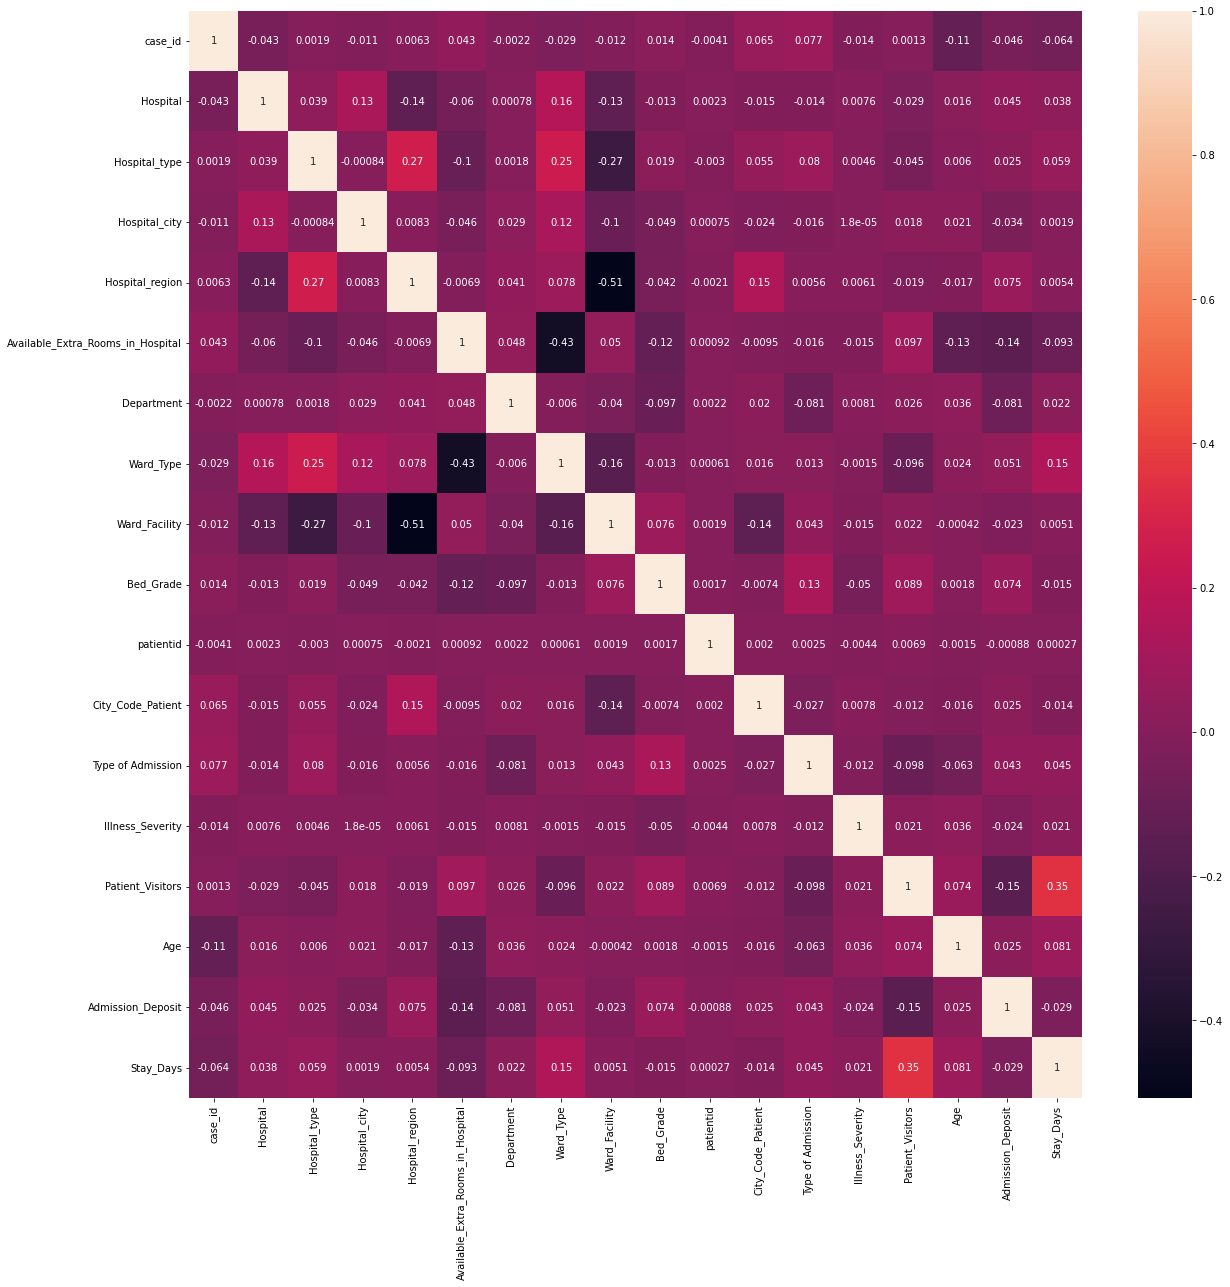

In [15]:
plt.figure(figsize=(20,20))
corr= df.corr() 
sns.heatmap(corr,annot=True)

In [16]:
target = df['Stay_Days']
df = df.drop(['Stay_Days'], axis=1)
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,2,2,5,4911.0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,2,2,5,5954.0
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,2,2,5,4745.0
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,2,2,5,7272.0
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,2,2,5,5558.0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normal = scaler.fit_transform(df)

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,random_state=1).fit_transform(normal)
X_embedded.shape

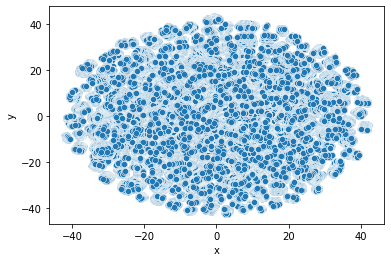

In [45]:
snsTest = pd.DataFrame(X_embedded,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normal)
X_embeddedPCA = pca.transform(normal)

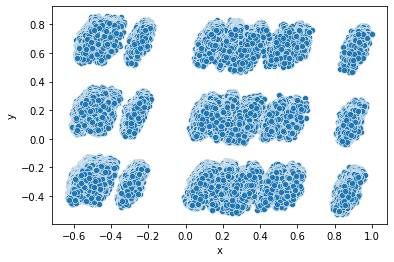

In [47]:
snsTest = pd.DataFrame(X_embeddedPCA,columns=['x','y'])
sns.scatterplot(data=snsTest,x='x',y='y')

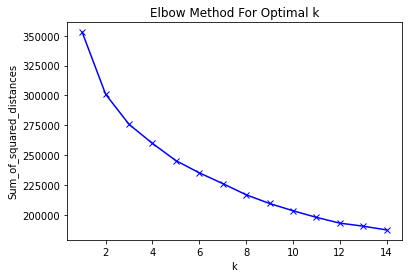

In [50]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normal)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

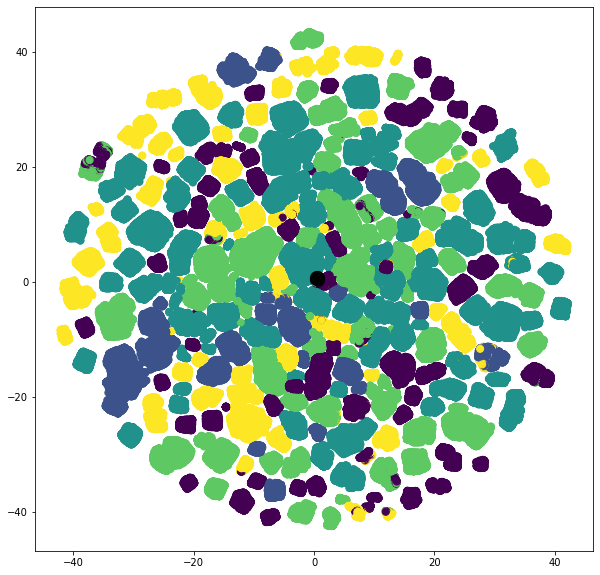

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(normal)
y_kmeans = kmeans.predict(normal)
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

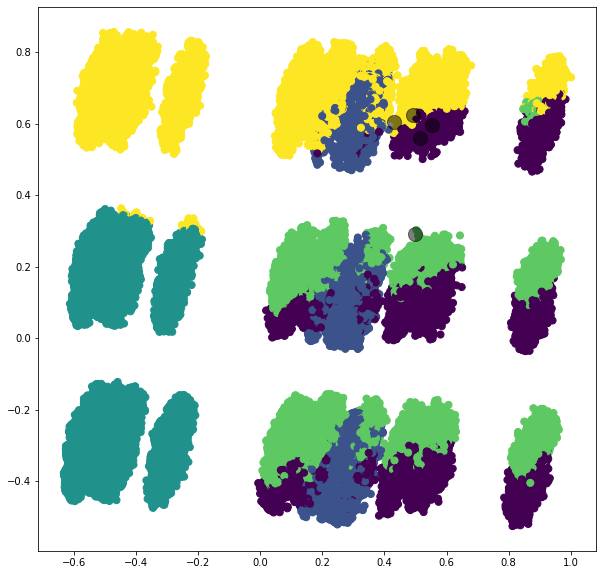

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(X_embeddedPCA[:, 0], X_embeddedPCA[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [55]:
predict = y_kmeans

In [56]:
ans = df 
ans['kmeans_clust'] = predict 

In [57]:
ans.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,kmeans_clust
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,2,2,5,4911.0,1
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,2,2,5,5954.0,1
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,2,2,5,4745.0,4
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,2,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,2,2,5,5558.0,4


In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, linkage = "single",n_clusters=None)
model.fit(normal)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, linkage = "complete",n_clusters=None)
model.fit(normal)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [53]:
from sklearn import metrics

avg = AgglomerativeClustering(linkage = "average",n_clusters=5)
avg.fit(normal)
avgH = avg.fit_predict(normal)
print(metrics.silhouette_score(normal, avgH))

com = AgglomerativeClustering(linkage = "complete",n_clusters=5)
com.fit(normal)
avgC = com.fit_predict(normal)
print(metrics.silhouette_score(normal, avgC))

ward = AgglomerativeClustering(linkage = "ward",n_clusters=5)
ward.fit(normal)
avgW = ward.fit_predict(normal)
print(metrics.silhouette_score(normal, avgW))

single = AgglomerativeClustering(linkage = "single",n_clusters=5)
single.fit(normal)
avgS = single.fit_predict(normal)
print(metrics.silhouette_score(normal, avgS))

kmeans = KMeans(n_clusters=4)
kmeans.fit(normal)
y_kmeans = kmeans.predict(normal)
print(metrics.silhouette_score(normal, y_kmeans))

NameError: ignored